In [10]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.int8)

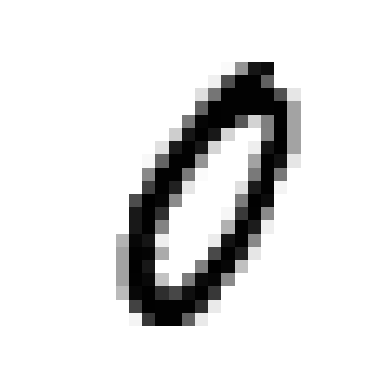

In [12]:
# Visualize a sample image
plt.imshow(X[3001].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

In [13]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
# Convert labels for binary classification (detecting '0')
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [14]:
# Train classifier
clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train_0)

# Predictions and evaluation
y_pred = clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [15]:
# Cross-validation score
print("Cross-validation scores:", cross_val_score(clf, X_train, y_train_0, cv=3))

Cross-validation scores: [0.9805  0.9906  0.98785]


In [16]:
precision_score(y_test_0, y_pred)

0.9016236867239733

In [17]:
recall_score(y_test_0, y_pred)

0.960325534079349

In [18]:
f1_score(y_test_0, y_pred)

0.9300492610837439